# Create Toy Datasets

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

sizeTitle = 20
sizeAxis = 10

## Mountain dataset

<IPython.core.display.Javascript object>


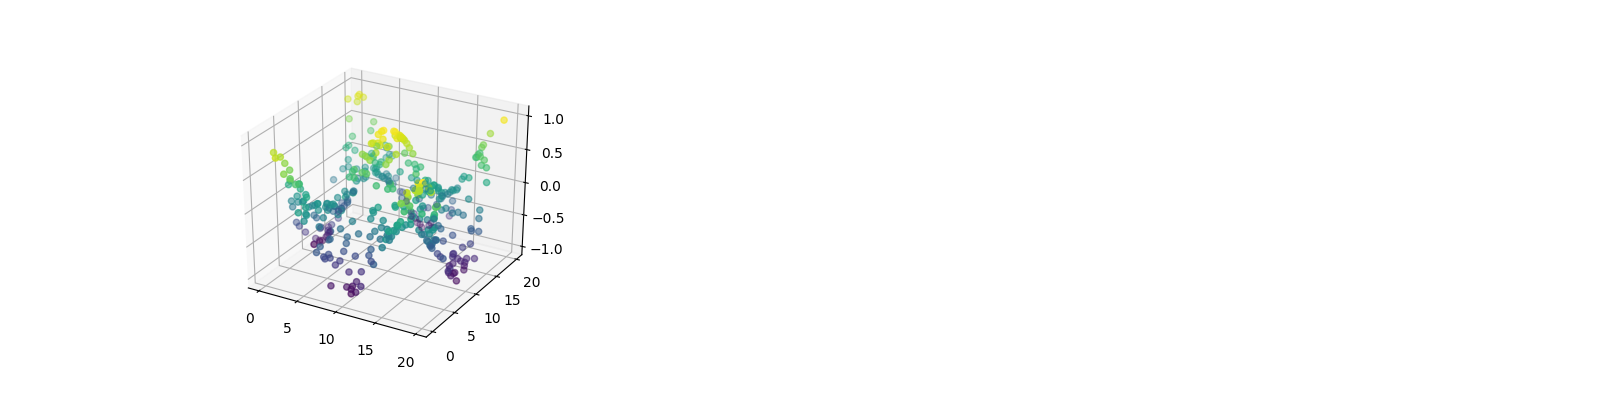

In [5]:
# Generate "mountain" dataset
N = 400 # Number of points
rangeX = 20
rangeY = 20

# 4 dimensions: x, y, z and color
mountain = np.empty((N,4))

mountain[:, 0] = np.random.rand(N) * rangeX
mountain[:, 1] = np.random.rand(N) * rangeY

# Sample a cos(x)*cos(y) function
mountain[:, 2] = np.multiply(np.cos(mountain[:, 0] * 2*np.pi / rangeX), np.cos(mountain[:, 1] * 2*np.pi / rangeY))

# Color = height
mountain[:, 3] = mountain[:, 2]

# Save data for later use
np.save("mountain", mountain)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountain[:,0], mountain[:,1], mountain[:,2], c=mountain[:,3])
plt.show()

<IPython.core.display.Javascript object>


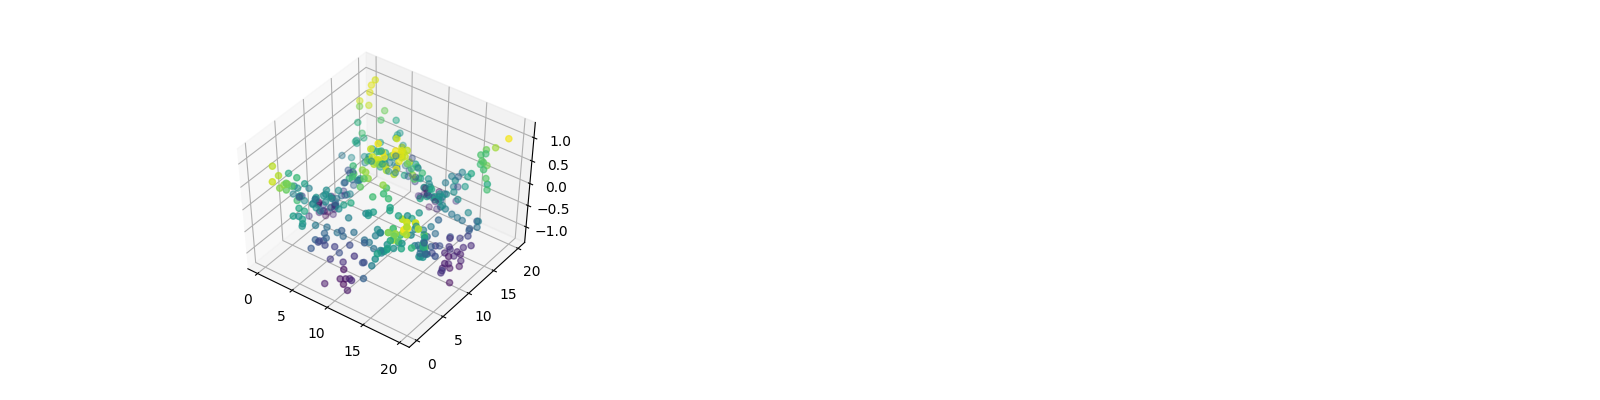

In [7]:
# Add some noise to the data
noiseMax = 0.5
mountainNoise = np.copy(mountain)
mountainNoise[:, 2] += (np.random.rand(N) - 0.5) * noiseMax

# Save data for later use
np.save("mountain_noise", mountainNoise)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountainNoise[:,0], mountainNoise[:,1], mountainNoise[:,2], c=mountainNoise[:,3])
plt.show()

<IPython.core.display.Javascript object>


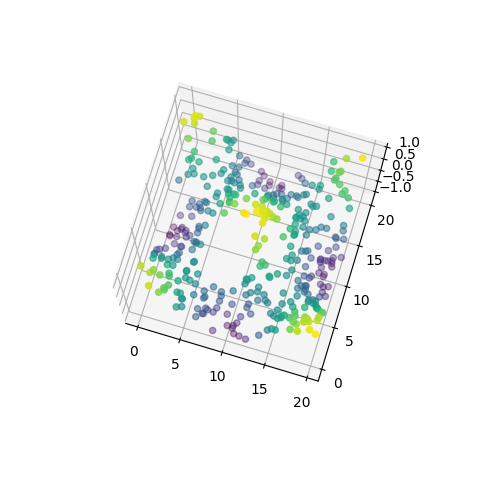

In [8]:
# Let's severe make a hole in the "moutain"
xSorted = np.argsort(mountain[:, 0])
ySorted = np.argsort(mountain[:, 1])

xRemove = xSorted[round(N/4):round(N/2)]
yRemove = ySorted[round(N/4):round(N/2)]

removeIndices = np.intersect1d(xRemove, yRemove)

mountainHole = np.delete(mountain, removeIndices, axis=0)

# Save data for later use
np.save("mountain_hole", mountainHole)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(mountainHole[:,0], mountainHole[:,1], mountainHole[:,2], c=mountainHole[:,3])
plt.show()

<IPython.core.display.Javascript object>


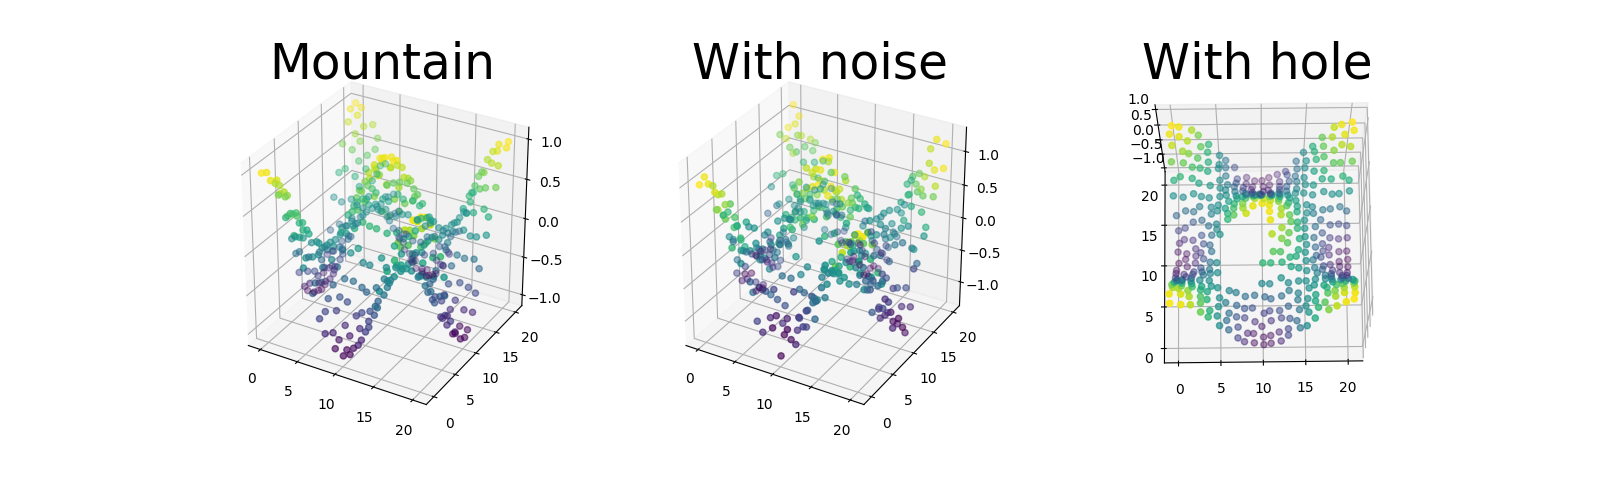

In [50]:
# Plot the 3 on one graph
fig = plt.figure(figsize = plt.figaspect(0.3))
matplotlib.rcParams.update({'font.size':sizeAxis})

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountain[:,0], mountain[:,1], mountain[:,2], c=mountain[:,3])
plt.title('Mountain', fontsize=35)

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(mountainNoise[:,0], mountainNoise[:,1], mountainNoise[:,2], c=mountainNoise[:,3])
plt.title('With noise', fontsize=35)

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(mountainHole[:,0], mountainHole[:,1], mountainHole[:,2], c=mountainHole[:,3])
plt.title('With hole', fontsize=35)

plt.show()

In [51]:
#plt.savefig('mountains.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


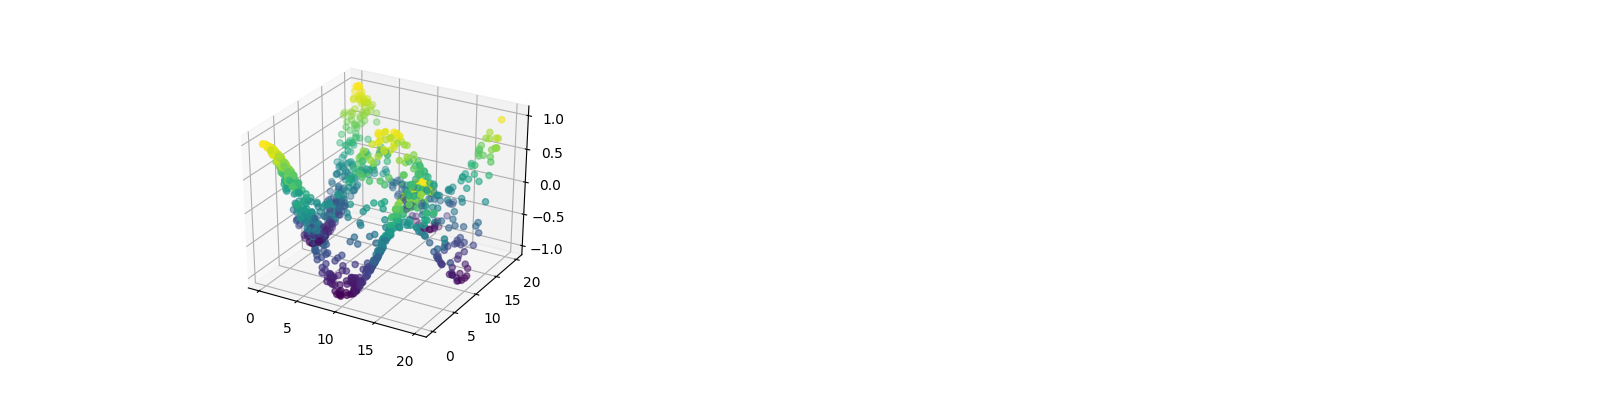

In [10]:
# Non uniform sampling

# Generate "mountain" dataset
N = 1000 # Number of points
rangeX = 20
rangeY = 20

# 4 dimensions: x, y, z and color
mountain_non_uni = np.empty((N,4))

# Non uniform sampling: corner very dense, 2 side dense, rest less dense
mountain_non_uni[:round(N/4), 0] = np.random.rand(round(N/4)) * rangeX/8
mountain_non_uni[:round(N/4), 1] = np.random.rand(round(N/4)) * rangeY

mountain_non_uni[round(N/4):round(N/2), 0] = np.random.rand(round(N/4)) * rangeX
mountain_non_uni[round(N/4):round(N/2), 1] = np.random.rand(round(N/4)) * rangeY/8

mountain_non_uni[round(N/2):, 0] = np.random.rand(round(N/2)) * rangeX
mountain_non_uni[round(N/2):, 1] = np.random.rand(round(N/2)) * rangeY

# Sample a cos(x)*cos(y) function
mountain_non_uni[:, 2] = np.multiply(np.cos(mountain_non_uni[:, 0] * 2*np.pi / rangeX), np.cos(mountain_non_uni[:, 1] * 2*np.pi / rangeY))

# Color = height
mountain_non_uni[:, 3] = mountain_non_uni[:, 2]

# Save data for later use
np.save("mountain_non_uni", mountain_non_uni)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountain_non_uni[:,0], mountain_non_uni[:,1], mountain_non_uni[:,2], c=mountain_non_uni[:,3])
plt.show()

In [34]:
plt.savefig('mountain_non_uni.eps', format='eps', bbox_inches='tight')

## Cylinder dataset

<IPython.core.display.Javascript object>


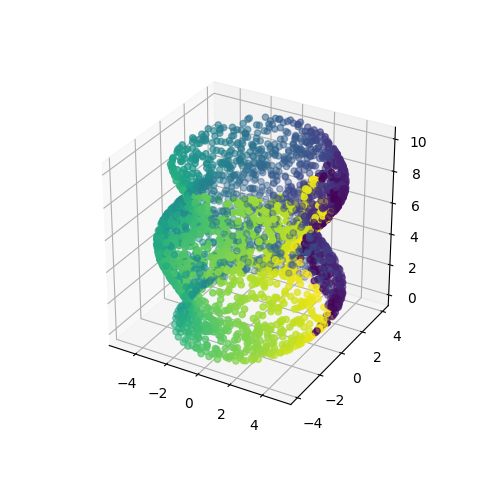

In [24]:
# Generate "mountain" dataset
N = 3000 # Number of samples
radius = 4
height = 10

# 4 dimensions: x, y, z and color
cylinder = np.empty((N,4))

angle = np.random.rand(1, N) * 2 *np.pi

# Generate sampling grid (x and y)
cylinder[:, 0] = radius * np.cos(angle)
cylinder[:, 1] = radius * np.sin(angle)
cylinder[:, 2] = np.random.rand(1, N) * height

cylinder[:, 0] += np.sin(cylinder[:, 2] / height * 3*np.pi)

# Color is radial
cylinder[:, 3] = angle

# Save data for later use
np.save("cylinder_full", cylinder)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(cylinder[:,0], cylinder[:,1], cylinder[:,2], c=cylinder[:,3])
#plt.show()
plt.savefig('cylinder_full.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


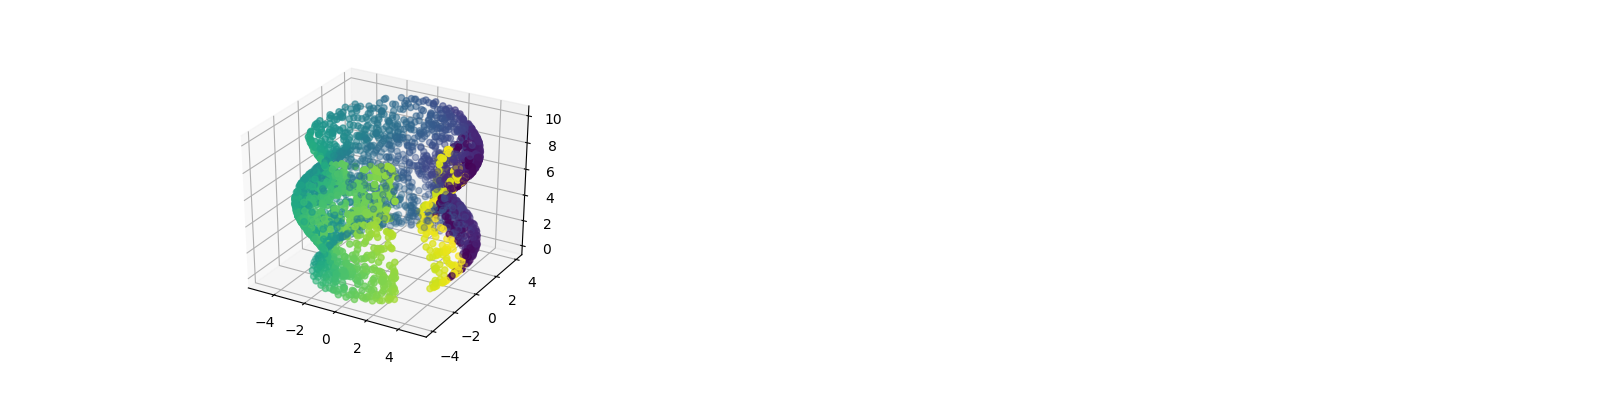

In [25]:
# Create a slit so that the cylinder is easier to unfold
rSorted = np.argsort(np.square(cylinder[:, 0]) + np.square(cylinder[:, 1]))
zSorted = np.argsort(cylinder[:, 2])

phi = np.arctan2(cylinder[:, 1], cylinder[:, 0])
phiSorted = np.argsort(phi)

phiRemove = phiSorted[round(N/2.8):round(N/2.35)]

cylinder_slit = np.delete(cylinder, phiRemove, axis=0)

# Save data for later use
np.save("cylinder", cylinder_slit)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(cylinder_slit[:,0], cylinder_slit[:,1], cylinder_slit[:,2], c=cylinder_slit[:,3])
#plt.show()
plt.savefig('cylinder.eps', format='eps', bbox_inches='tight')

## Twist dataset

<IPython.core.display.Javascript object>


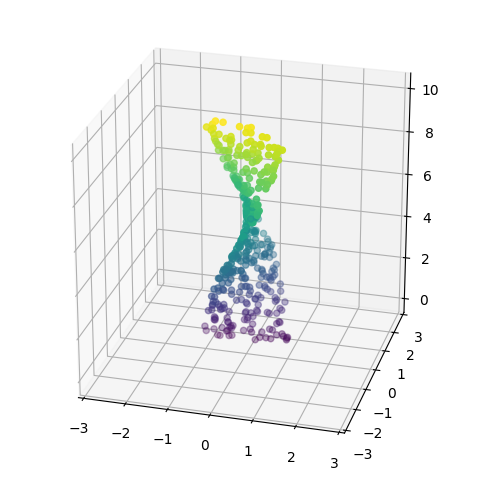

In [37]:
N = 400 # Number of points
width = 2
length = 10

u = np.random.rand(1, N) * length
v = (np.random.rand(1, N) - 0.5) * width

# 4 dimensions: x, y, z and color
twist = np.empty((N,4))

twist[:, 2] = u

twist[:, 0] = np.multiply(np.cos(twist[:, 2] * np.pi / length), v)
twist[:, 1] = np.multiply(np.sin(twist[:, 2] * np.pi / length), v)

# Color = height
twist[:, 3] = twist[:, 2]

# Save data for later use
np.save("twist", twist)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(twist[:,0], twist[:,1], twist[:,2], c=twist[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.show()

In [32]:
plt.savefig('twist.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


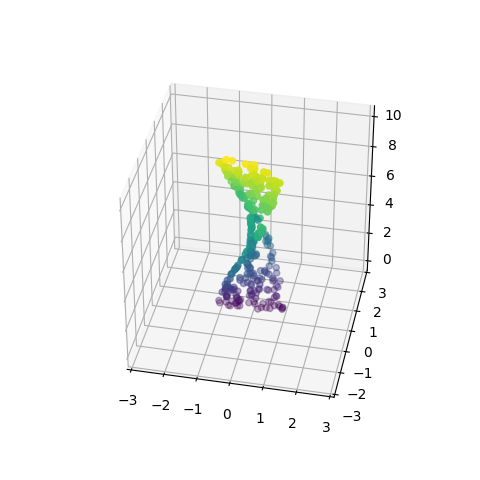

In [38]:
# Let's remove a part
rSorted = np.argsort(np.square(twist[:, 0]) + np.square(twist[:, 1]))
zSorted = np.argsort(twist[:, 2])

rRemove = rSorted[round(N/4):round(3*N/4)]
zRemove = zSorted[round(N/4):round(N*3/4)]

removeIndices = np.intersect1d(rRemove, zRemove)

twistHole = np.delete(twist, removeIndices, axis=0)

fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(twistHole[:,0], twistHole[:,1], twistHole[:,2], c=twistHole[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# Save data for later use
np.save("twist_hole", twistHole)

In [52]:
plt.savefig('twist_hole.eps', format='eps', bbox_inches='tight')

## Exponential spiral

<IPython.core.display.Javascript object>


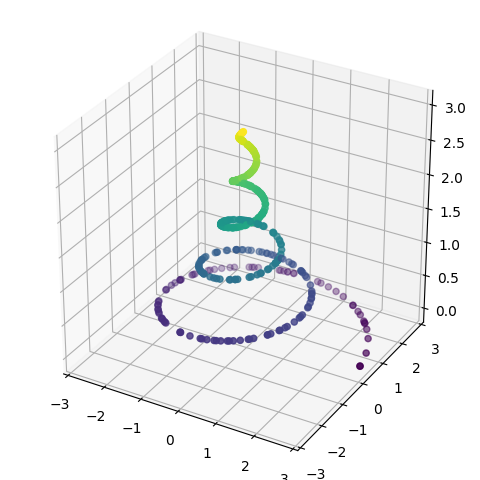

In [30]:
N = 400 # Number of points

width = 3
tau = 0.1
t_max = 30

t = np.random.rand(1, N) * t_max

# 4 dimensions: x, y, z and color
spiral = np.empty((N,4))

spiral[:, 2] = 0.1*t

spiral[:, 0] = np.multiply(np.cos(t), width*np.exp(-tau*t))
spiral[:, 1] = np.multiply(np.sin(t), width*np.exp(-tau*t))

# Color = height
spiral[:, 3] = spiral[:, 2]

# Save data for later use
np.save("spiral", spiral)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(spiral[:,0], spiral[:,1], spiral[:,2], c=spiral[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.show()

In [31]:
plt.savefig('spiral_few.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


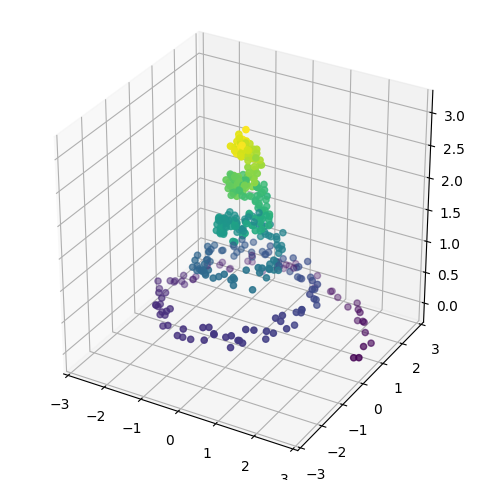

In [32]:
# Add noise
spiral_noise = np.copy(spiral)

noise = 0.3

spiral_noise[:,0] += noise*(np.random.rand(N) - 0.5)
spiral_noise[:,1] += noise*(np.random.rand(N) - 0.5)
spiral_noise[:,2] += noise*(np.random.rand(N) - 0.5)

# Save data for later use
np.save("spiral_noise", spiral_noise)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(spiral_noise[:,0], spiral_noise[:,1], spiral_noise[:,2], c=spiral_noise[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.show()

# Effect of Hyperparameters and perturbations

In [12]:
import scipy.io
import numpy as np
from sklearn import manifold, datasets
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

sizeTitle = 24
sizeAxis = 14

## Moutain dataset

In [40]:
mountain_uni = scipy.io.loadmat('points_mountain.mat')
mountain_uni = mountain_uni['points_mountain']
mountain = np.load("mountain.npy")
mountain_noise = np.load("mountain_noise.npy")
mountain_hole = np.load("mountain_hole.npy")
mountain_non_uni = np.load("mountain_non_uni.npy")

<IPython.core.display.Javascript object>


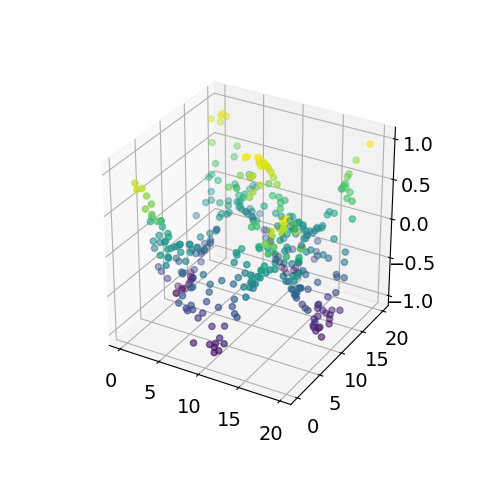

In [42]:
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(mountain_hole[:,0], mountain_hole[:,1], mountain_hole[:,2], c=mountain_hole[:,3])
#ax = fig.add_subplot(1, 2, 2,  projection='3d')
#ax.scatter(mountain_uni[:,0], mountain_uni[:,1], mountain_uni[:,2], c=mountain_uni[:,2])
plt.show()
#plt.savefig('mountain_hole.eps', format='eps')

<IPython.core.display.Javascript object>


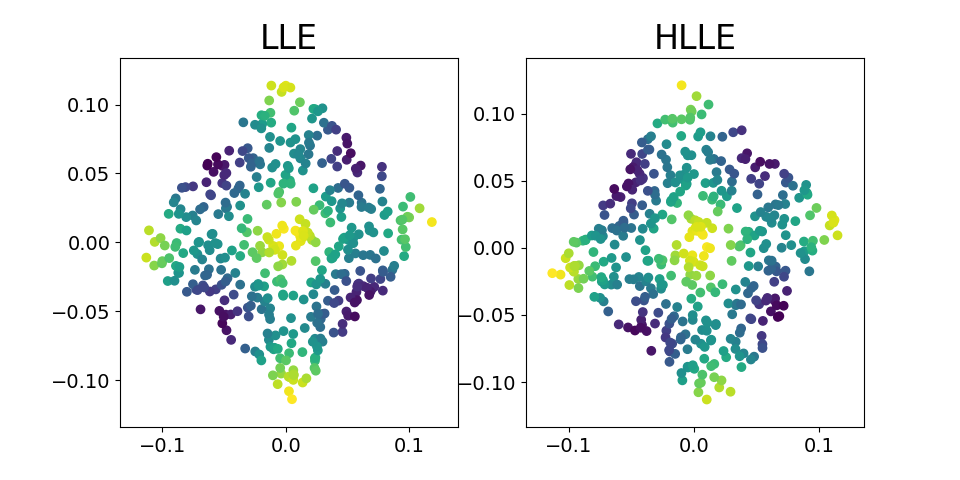

In [15]:
# mountain
n_components = 2
n_neighbors = 15 # Interesting values: 15, 30

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_mountain_LLE = LLE.fit_transform(mountain[:,0:3])
y_mountain_HLLE = HLLE.fit_transform(mountain[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_mountain_LLE[:,0], y_mountain_LLE[:,1], c=mountain[:,3])
plt.title('LLE', fontsize=sizeTitle)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_mountain_HLLE[:,0], y_mountain_HLLE[:,1], c=mountain[:,3])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

plt.savefig('mountain_LLE_HLLE.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


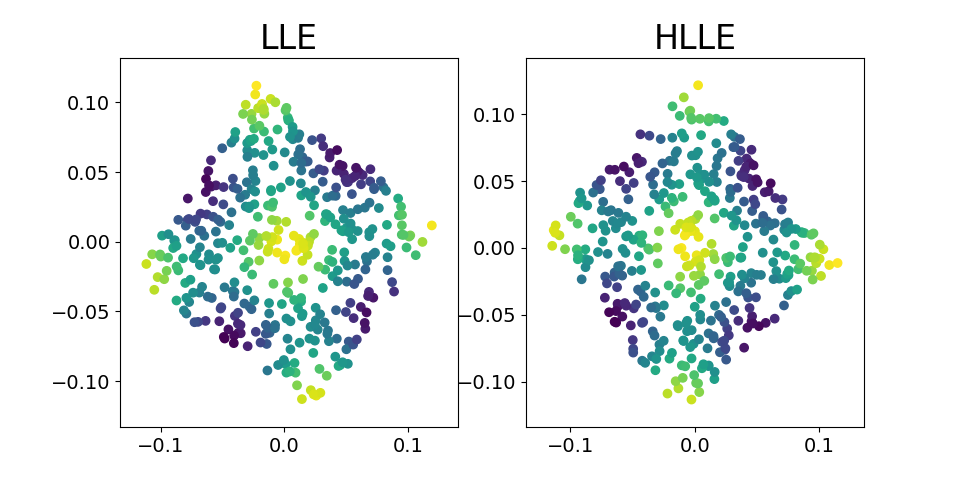

In [16]:
# noise
n_components = 2
n_neighbors = 15 # Interesting values: 15, 30

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_mountain_noise_LLE = LLE.fit_transform(mountain_noise[:,0:3])
y_mountain_noise_HLLE = HLLE.fit_transform(mountain_noise[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_mountain_noise_LLE[:,0], y_mountain_noise_LLE[:,1], c=mountain_noise[:,3])
plt.title('LLE', fontsize=sizeTitle)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_mountain_noise_HLLE[:,0], y_mountain_noise_HLLE[:,1], c=mountain_noise[:,3])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

plt.savefig('mountain_noise_LLE_HLLE.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


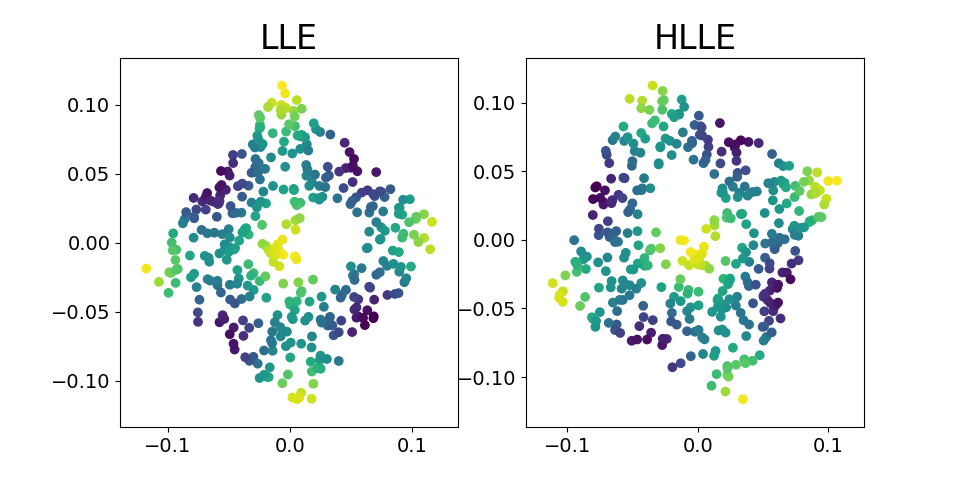

In [17]:
# hole
n_components = 2
n_neighbors = 15 # Interesting values: 15, 30

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_mountain_hole_LLE = LLE.fit_transform(mountain_hole[:,0:3])
y_mountain_hole_HLLE = HLLE.fit_transform(mountain_hole[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_mountain_hole_LLE[:,0], y_mountain_hole_LLE[:,1], c=mountain_hole[:,3])
plt.title('LLE', fontsize=sizeTitle)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_mountain_hole_HLLE[:,0], y_mountain_hole_HLLE[:,1], c=mountain_hole[:,3])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

plt.savefig('mountain_hole_LLE_HLLE.eps', format='eps', bbox_inches='tight')

### Effect of grid sampling

<IPython.core.display.Javascript object>


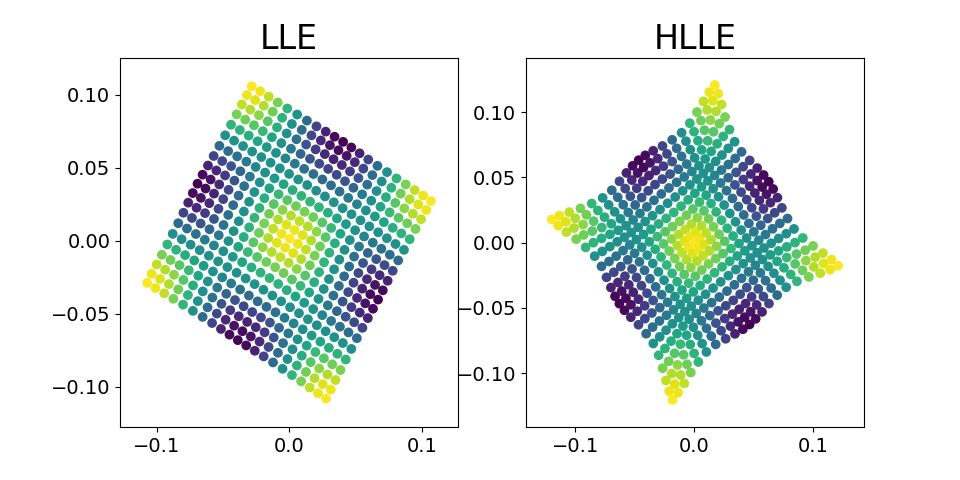

In [18]:
# uniform samplong
n_components = 2
n_neighbors = 10 # Interesting values: 15, 30

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_mountain_uni_LLE = LLE.fit_transform(mountain_uni[:,0:3])
y_mountain_uni_HLLE = HLLE.fit_transform(mountain_uni[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_mountain_uni_LLE[:,0], y_mountain_uni_LLE[:,1], c=mountain_uni[:,2])
plt.title('LLE', fontsize=sizeTitle)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_mountain_uni_HLLE[:,0], y_mountain_uni_HLLE[:,1], c=mountain_uni[:,2])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

plt.savefig('uniform_sampling.eps', format='eps', bbox_inches='tight')

### Effect of non uniform sampling

<IPython.core.display.Javascript object>


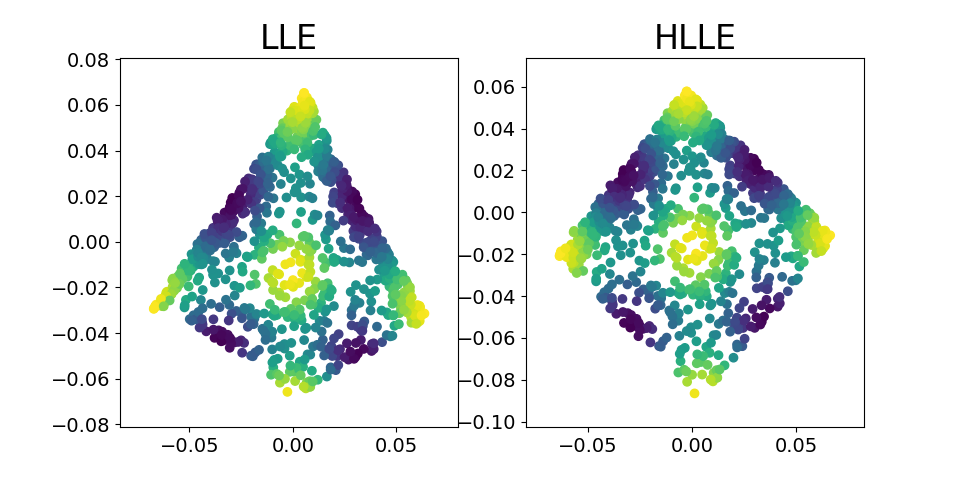

In [51]:
# mountain
n_components = 2
n_neighbors = 10

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_mountain_non_uni_LLE = LLE.fit_transform(mountain_non_uni[:,0:3])
y_mountain_non_uni_HLLE = HLLE.fit_transform(mountain_non_uni[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_mountain_non_uni_LLE[:,0], y_mountain_non_uni_LLE[:,1], c=mountain_non_uni[:,3])
plt.title('LLE', fontsize=sizeTitle)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_mountain_non_uni_HLLE[:,0], y_mountain_non_uni_HLLE[:,1], c=mountain_non_uni[:,3])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

plt.savefig('mountain_non_uni_LLE_HLLE.eps', format='eps', bbox_inches='tight')

## Cylinder dataset

<IPython.core.display.Javascript object>


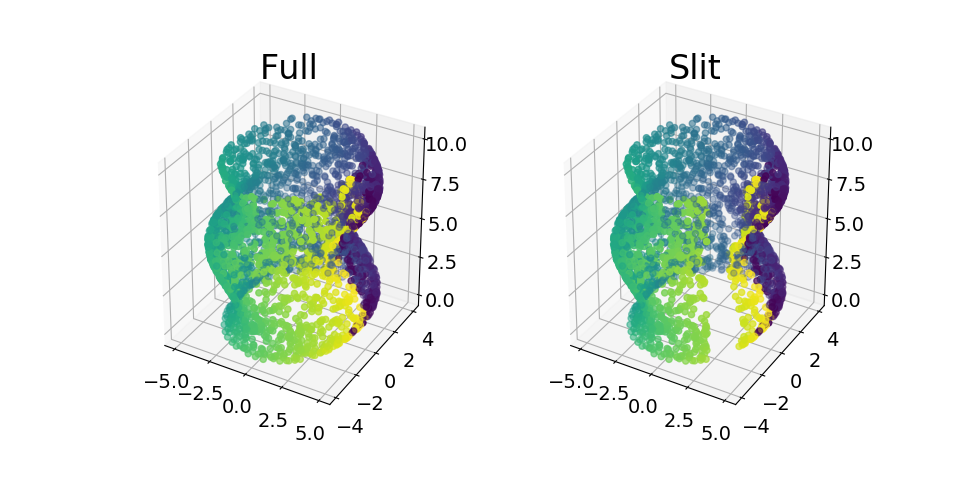

In [25]:
cylinder = np.load("cylinder.npy")
cylinder_full = np.load("cylinder_full.npy")

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(cylinder_full[:,0], cylinder_full[:,1], cylinder_full[:,2], c=cylinder_full[:,3])
plt.title('Full', fontsize=sizeTitle)
ax = fig.add_subplot(1, 2, 2,  projection='3d')
ax.scatter(cylinder[:,0], cylinder[:,1], cylinder[:,2], c=cylinder[:,3])
plt.title('Slit', fontsize=sizeTitle)
plt.show()

In [26]:
plt.savefig('cylinders.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


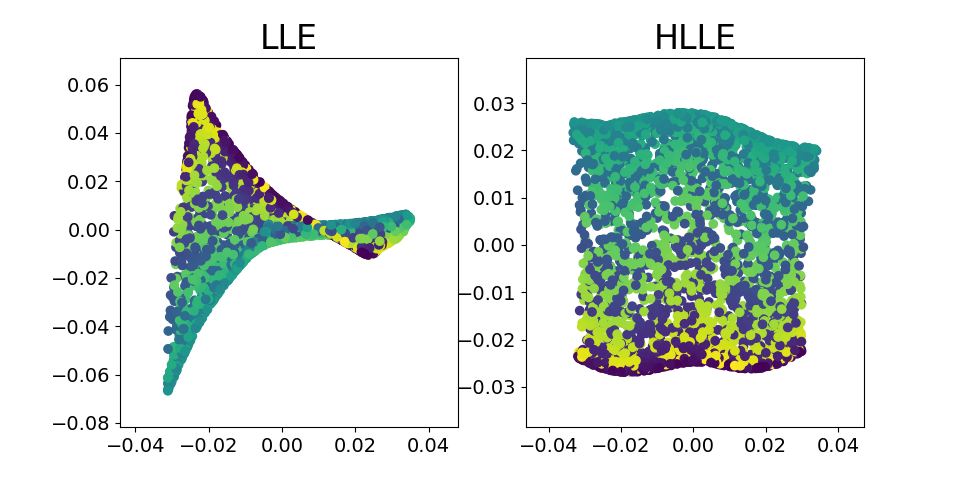

In [27]:
# full cylinder
n_components = 2
n_neighbors = 15 # Interesting values: 15, 30

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_cylinder_full_LLE = LLE.fit_transform(cylinder_full[:,0:3])
y_cylinder_full_HLLE = HLLE.fit_transform(cylinder_full[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_cylinder_full_LLE[:,0], y_cylinder_full_LLE[:,1], c=cylinder_full[:,3])
plt.title('LLE', fontsize=sizeTitle)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_cylinder_full_HLLE[:,0], y_cylinder_full_HLLE[:,1], c=cylinder_full[:,3])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

plt.savefig('cylinder_full_LLE_HLLE.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


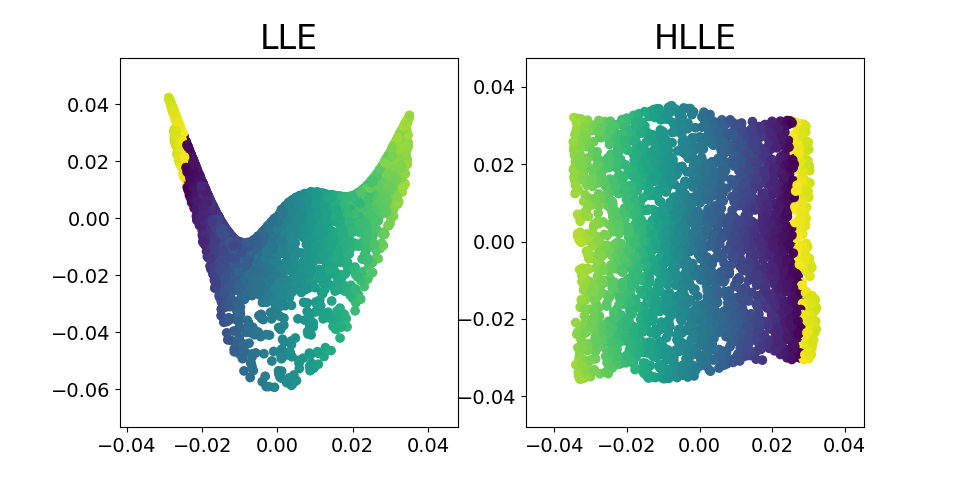

In [28]:
# slit cylinder
n_components = 2
n_neighbors = 15 # Interesting values: 15, 30

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_cylinder_LLE = LLE.fit_transform(cylinder[:,0:3])
y_cylinder_HLLE = HLLE.fit_transform(cylinder[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_cylinder_LLE[:,0], y_cylinder_LLE[:,1], c=cylinder[:,3])
plt.title('LLE', fontsize=sizeTitle)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_cylinder_HLLE[:,0], y_cylinder_HLLE[:,1], c=cylinder[:,3])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

plt.savefig('cylinder_LLE_HLLE.eps', format='eps', bbox_inches='tight')

## Twist dataset

<IPython.core.display.Javascript object>


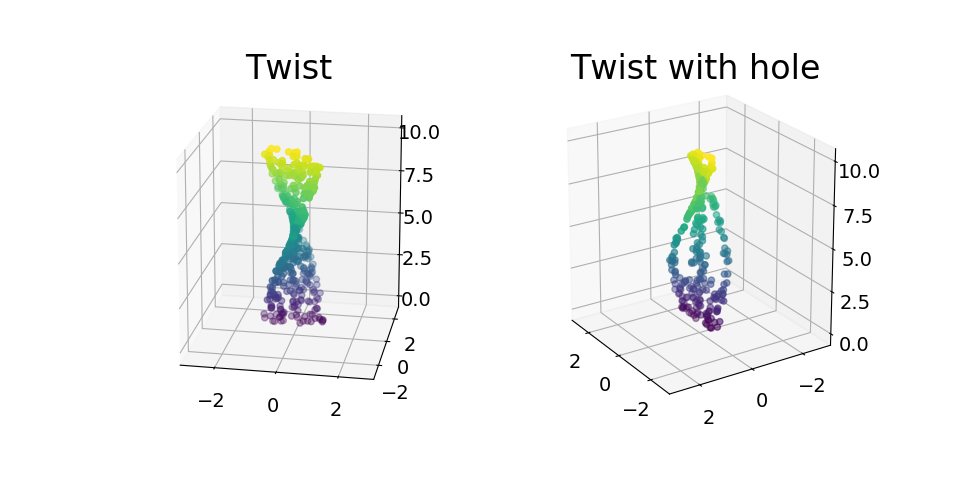

In [20]:
twist = np.load("twist.npy")
twistHole = np.load("twist_hole.npy")

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(twist[:,0], twist[:,1], twist[:,2], c=twist[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('Twist', fontsize=sizeTitle)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(twistHole[:,0], twistHole[:,1], twistHole[:,2], c=twistHole[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('Twist with hole', fontsize=sizeTitle)
plt.show()

In [21]:
plt.savefig('twists.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


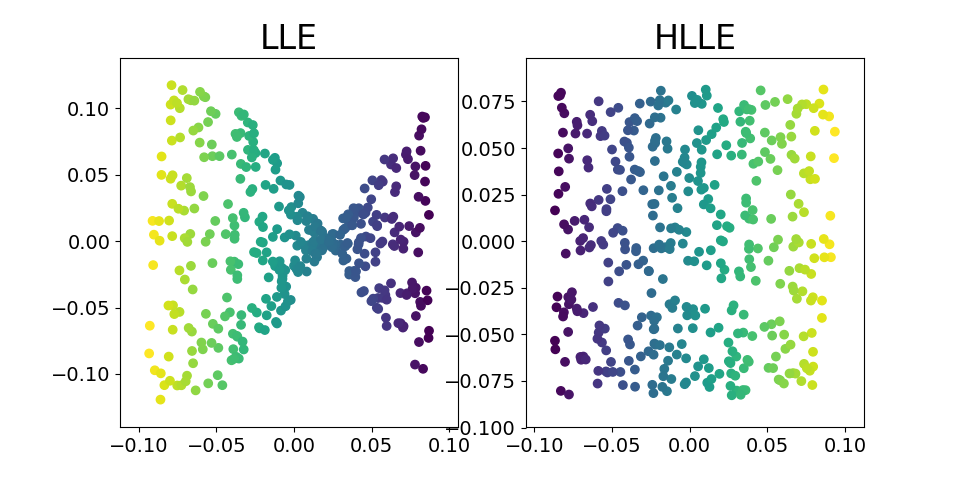

In [23]:
n_components = 2
n_neighbors = 50

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_twist_LLE = LLE.fit_transform(twist[:,0:3])
y_twist_HLLE = HLLE.fit_transform(twist[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_twist_LLE[:,0], y_twist_LLE[:,1], c=twist[:,3])
plt.title('LLE', fontsize=sizeTitle)
ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_twist_HLLE[:,0], y_twist_HLLE[:,1], c=twist[:,3])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

#fig = plt.figure(figsize = plt.figaspect(1))
#ax = fig.add_subplot(1, 1, 1)
#ax.scatter(y_twist_LLE[:,0], y_twist_LLE[:,1], c=twist[:,3])

plt.savefig('twist_LLE_HLLE_50.eps', format='eps')

In [88]:
twist[1,0:3]

array([  0.09444626,   0.27446115,  39.45048885])

<IPython.core.display.Javascript object>


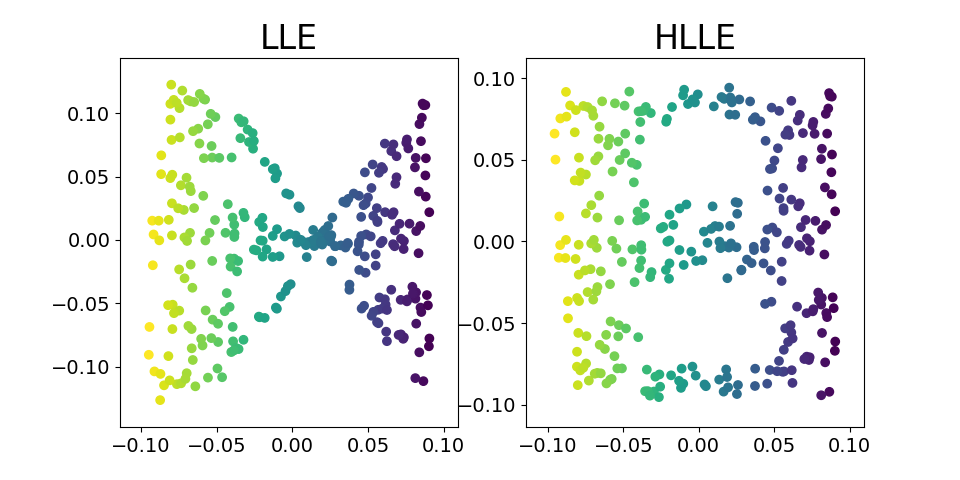

In [24]:
n_components = 2
n_neighbors = 50

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_twist_LLE = LLE.fit_transform(twistHole[:,0:3])
y_twist_HLLE = HLLE.fit_transform(twistHole[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_twist_LLE[:,0], y_twist_LLE[:,1], c=twistHole[:,3])
plt.title('LLE', fontsize=sizeTitle)
ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_twist_HLLE[:,0], y_twist_HLLE[:,1], c=twistHole[:,3])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

plt.savefig('twist_hole_LLE_HLLE_50.eps', format='eps')

## Spiral dataset

<IPython.core.display.Javascript object>


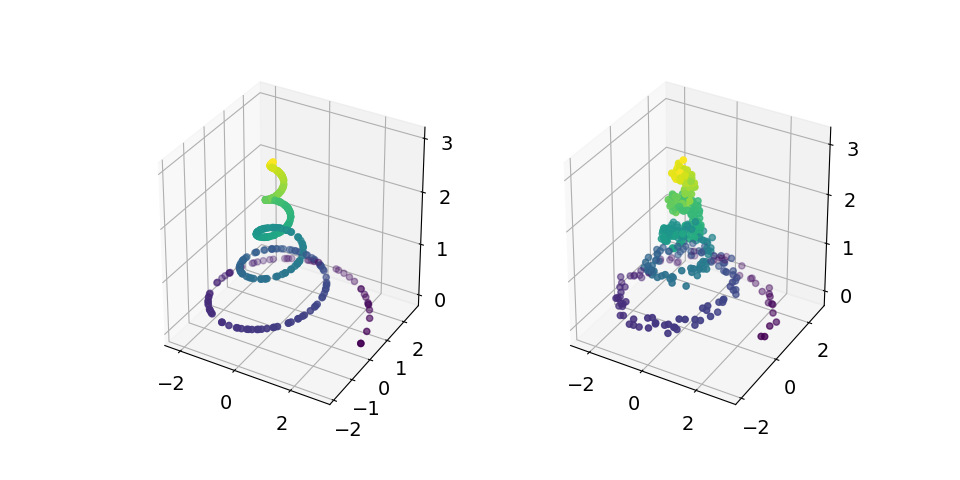

In [30]:
spiral = np.load("spiral.npy")
spiral_noise = np.load("spiral_noise.npy")

fig = plt.figure(figsize = plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(spiral[:,0], spiral[:,1], spiral[:,2], c=spiral[:,3])
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(spiral_noise[:,0], spiral_noise[:,1], spiral_noise[:,2], c=spiral_noise[:,3])
plt.show()

<IPython.core.display.Javascript object>


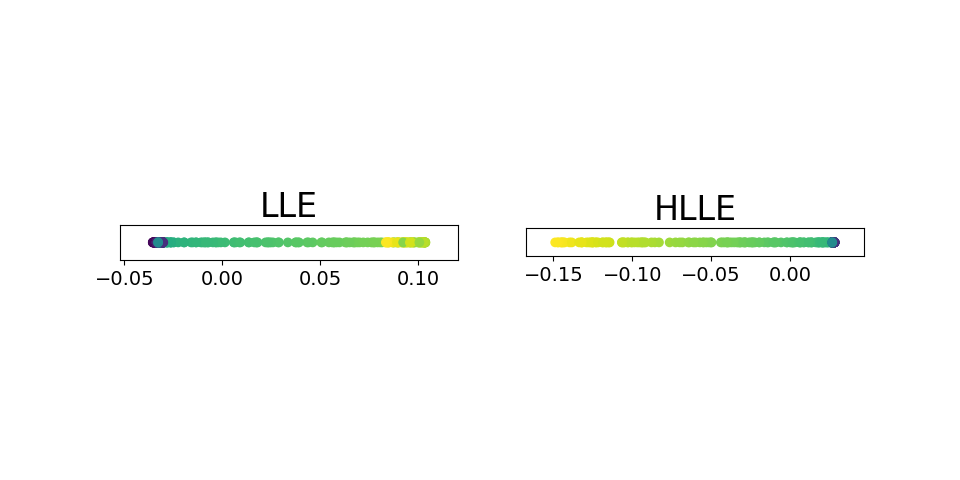

In [32]:
# Embed in 1D
n_components = 1
n_neighbors = 20

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_spiral_LLE = LLE.fit_transform(spiral[:,0:3])
y_spiral_HLLE = HLLE.fit_transform(spiral[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_spiral_LLE[:,0], 0*y_spiral_LLE[:,0], c=spiral[:,3])
ax.set_aspect('equal')
plt.title('LLE', fontsize=sizeTitle)
ax.get_yaxis().set_visible(False)
ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_spiral_HLLE[:,0], 0*y_spiral_HLLE[:,0], c=spiral[:,3])
ax.set_aspect('equal')
plt.title('HLLE', fontsize=sizeTitle)
ax.get_yaxis().set_visible(False)

plt.show()

plt.savefig('spiral_LLE_HLLE_1D.eps', format='eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


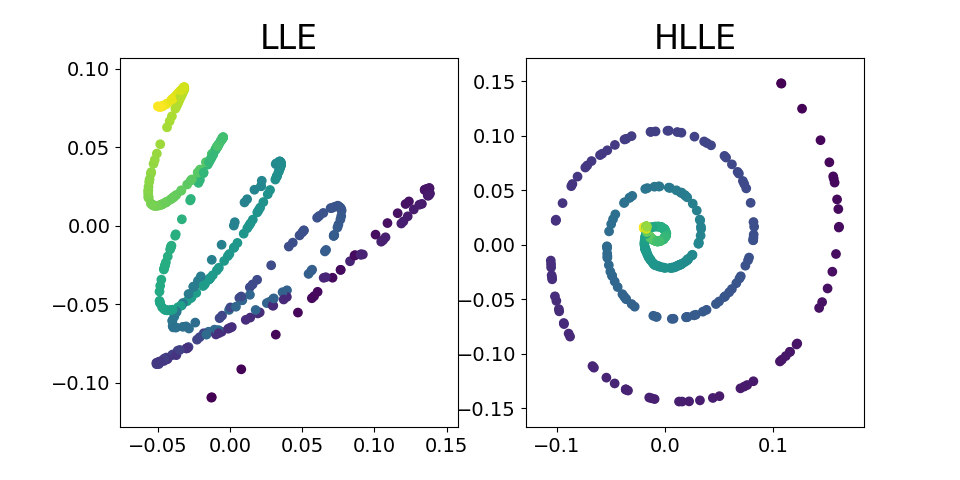

In [34]:
# Embed in 2D
n_components = 2
n_neighbors = 60 # Bad result:20   Good result:60

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_spiral_LLE = LLE.fit_transform(spiral[:,0:3])
y_spiral_HLLE = HLLE.fit_transform(spiral[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_spiral_LLE[:,0], y_spiral_LLE[:,1], c=spiral[:,3])
plt.title('LLE', fontsize=sizeTitle)
ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_spiral_HLLE[:,0], y_spiral_HLLE[:,1], c=spiral[:,3])
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

plt.savefig('spiral_LLE_HLLE_60.eps', format='eps')

<IPython.core.display.Javascript object>


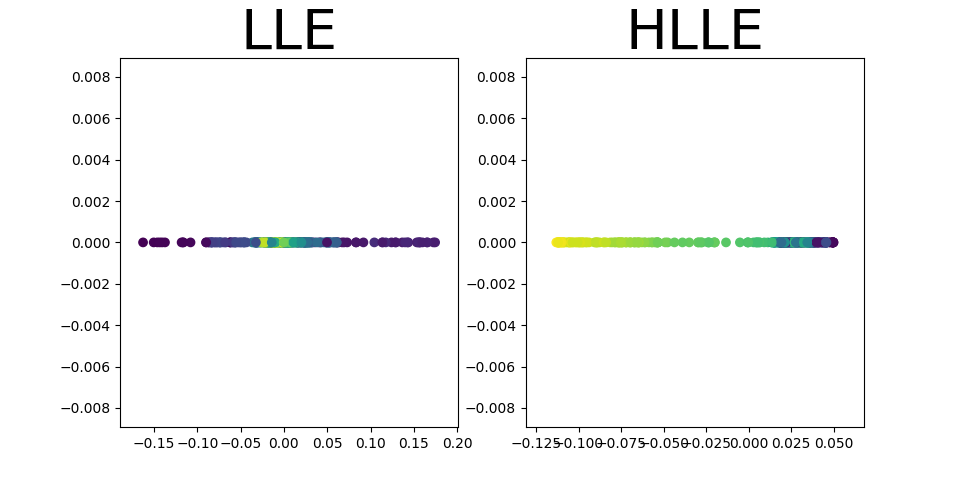

In [63]:
# With noise
n_components = 1
n_neighbors = 20

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='auto',
                                           method='hessian')

y_spiral_noise_LLE = LLE.fit_transform(spiral_noise[:,0:3])
y_spiral_noise_HLLE = HLLE.fit_transform(spiral_noise[:,0:3])

fig = plt.figure(figsize = plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(y_spiral_noise_LLE[:,0], 0*y_spiral_noise_LLE[:,0], c=spiral_noise[:,3])
plt.title('LLE', fontsize=40)
ax = fig.add_subplot(1, 2, 2)
ax.scatter(y_spiral_noise_HLLE[:,0], 0*y_spiral_noise_HLLE[:,0], c=spiral_noise[:,3])
plt.title('HLLE', fontsize=40)

plt.show()

plt.savefig('spiral_LLE_HLLE.eps', format='eps')

# High Dimensional datasets analysis

# Calltech101 silhouettes

In [5]:
#TO BE RUN TWICE TO ACTIVATE THE INTERACTIVE PLOTS

import scipy.io
import numpy as np
from sklearn import manifold, datasets, model_selection
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import time
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust
import matplotlib
from tqdm import tqdm

%matplotlib notebook

(8671, 784)
(8671,)


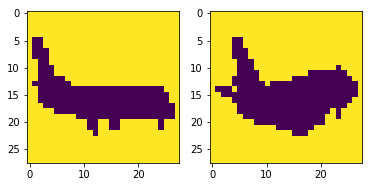

In [2]:
silhouette = scipy.io.loadmat('silhouette.mat')
data = silhouette['X']
labels = silhouette['Y'].transpose().ravel()

print(np.shape(data))
print(np.shape(labels))

fig = plt.figure(0)
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(np.transpose(np.reshape(data[500,:],(28,28))))
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(np.transpose(np.reshape(data[300,:],(28,28))))

In [3]:
# take only the first 10 classes

data_new = data[labels==1,:]

for label in range(2,11):
    data_new = np.concatenate((data_new, data[labels==label,:]), axis=0)
    
labels_new = labels[0:np.size(data_new,0)]

print(np.shape(data_new))
print(np.shape(labels_new))

(2906, 784)
(2906,)


In [4]:
method = ['hessian','standard']
embed = manifold.LocallyLinearEmbedding(n_neighbors = 300 , n_components=3,
                                                             eigen_solver='dense',
                                                             method=method[0])
projected_hess = embed.fit_transform(data_new)
embed = manifold.LocallyLinearEmbedding(n_neighbors = 300 , n_components=3,
                                                             eigen_solver='dense',
                                                             method=method[1])
projected_std = embed.fit_transform(data_new)

In [ ]:
fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size': 10})

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(projected_hess[:,0], projected_hess[:,1],projected_hess[:,2], c=labels_new)
plt.title('HLLE',fontsize=20)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(projected_std[:,0], projected_std[:,1],projected_std[:,2], c=labels_new)
plt.title('LLE',fontsize=20)

In [6]:
classifier = SGDClassifier(loss='log',max_iter=100, tol=1e-5)
ratio = 0.6
data_tr, data_te, label_tr, label_te = model_selection.train_test_split(data_new, labels_new, train_size = ratio)

start1 = time.time()
model = classifier.fit(data_tr, label_tr)
stop1 = time.time()
score = model.score(data_te, label_te)
print('Logistic Regression on the origninal space took {:0.2f} seconds to perform a test accuracy of {:0.2f}%' .format((stop1-start1), 100*score))

classifier = SGDClassifier(loss='log',max_iter=100, tol=1e-5)
data_tr, data_te, label_tr, label_te = model_selection.train_test_split(projected_hess, labels_new, train_size = ratio)
start = time.time()
model = classifier.fit(data_tr, label_tr)
stop = time.time()
time1 = stop-start
score1 = model.score(data_te, label_te)

data_tr, data_te, label_tr, label_te = model_selection.train_test_split(projected_std, labels_new, train_size = ratio)
start = time.time()
model = classifier.fit(data_tr, label_tr)
stop = time.time()
time2 = stop-start
score2 = model.score(data_te, label_te)

print('With a 3D embedding using LLE and HLLE, the resulting classification accuracy on the embedded space are {:0.2f}% and {:0.2f}% respectively' .format(100*score2, 100*score1))
print('Moreover, the classifier took {:0.2f} and {:0.2f} seconds respectively' .format(time2, time1))


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Logistic Regression on the origninal space took 0.49 seconds to perform a test accuracy of 76.35%
With a 3D embedding using LLE and HLLE, the resulting classification accuracy on the embedded space are 59.76% and 52.54% respectively
Moreover, the classifier took 0.01 and 0.01 seconds respectively


In [7]:

# perform grid search on LLE only
n_components = [20,50,100,150,200]
neigh = [250,300,350,400]
ratio = 0.6
method = ['standard']
scores_lleonly = np.zeros((len(neigh),len(n_components)))
data_tr, data_te, label_tr, label_te = model_selection.train_test_split(data_new, labels_new, train_size = ratio)

for idxn,neighb in enumerate(tqdm(neigh)):
    for idxc,comp in enumerate(n_components):
        embed = manifold.LocallyLinearEmbedding(n_neighbors = neighb , n_components=comp,
                                                         eigen_solver='dense',
                                                         method=method[0])
        classifier = SGDClassifier(loss='log',max_iter=100, tol=1e-5)
        projected_std = embed.fit_transform(data_new)
        data_tr, data_te, label_tr, label_te = model_selection.train_test_split(projected_std, labels_new, train_size = ratio)
        model = classifier.fit(data_tr, label_tr)
        scores_lleonly[idxn][idxc] = model.score(data_te, label_te)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
100%|██████████| 4/4 [15:03<00:00, 225.98s/it]


<IPython.core.display.Javascript object>


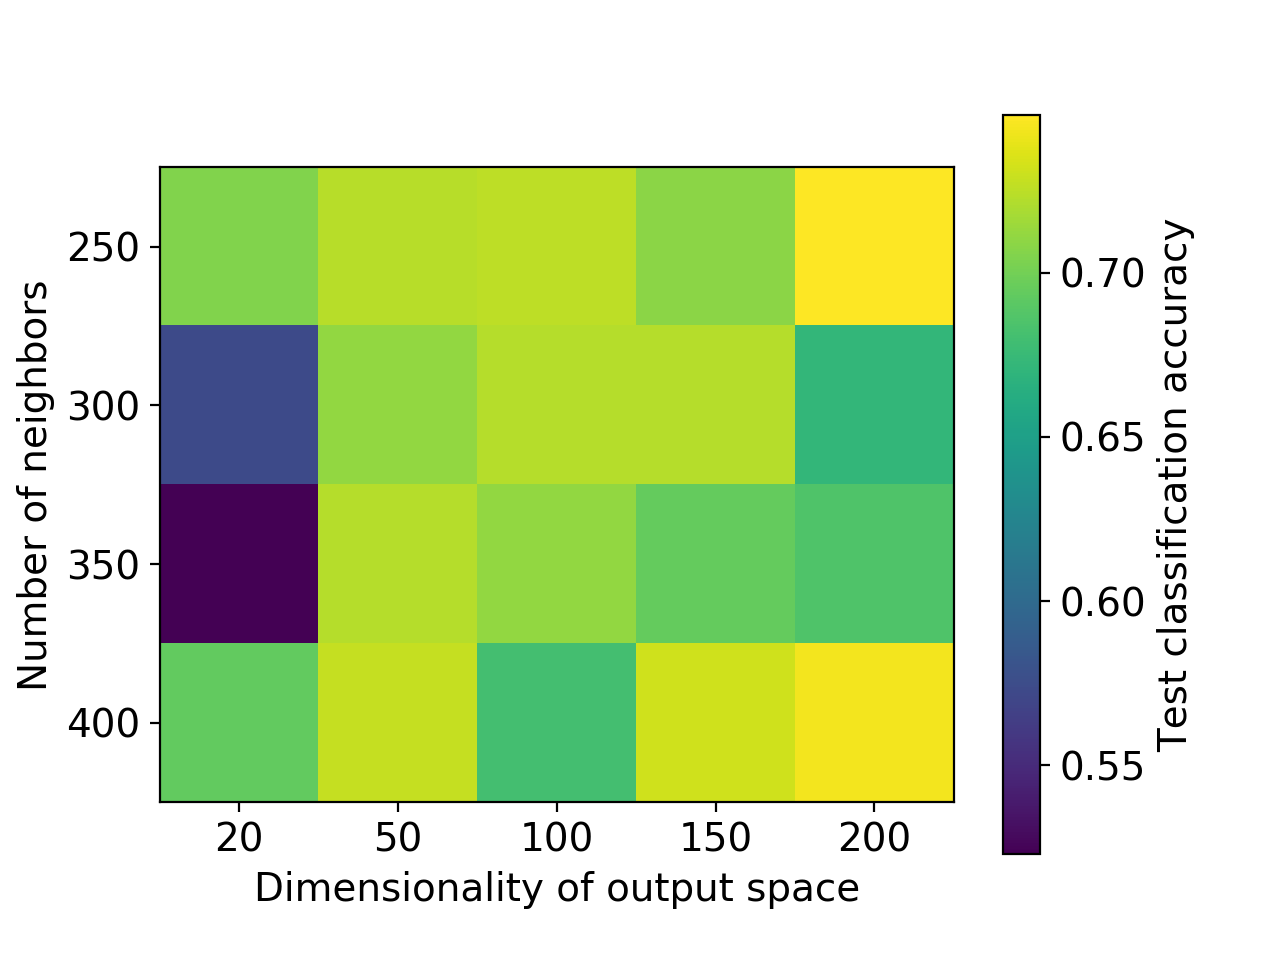

In [13]:
matplotlib.rcParams.update({'font.size': 14})
plt.imshow(scores_lleonly)

ax = plt.gca();
ax.set_xticks(np.arange(0, 5, 1));
ax.set_yticks(np.arange(0, 4, 1));
ax.set_xticklabels(n_components);
ax.set_yticklabels(neigh);

cbar = plt.colorbar()
cbar.set_label('Test classification accuracy')
plt.xlabel('Dimensionality of output space')
plt.ylabel('Number of neighbors')
plt.savefig('accLLE.eps', format='eps', bbox_inches='tight')

# Wisconsin Breast Cancer Dataset

In [8]:
import scipy.io
import numpy as np
from sklearn import manifold, datasets, model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

sizeTitle = 24
sizeAxis = 14

In [2]:
cancer = datasets.load_breast_cancer() # 30D, 569 points

<IPython.core.display.Javascript object>


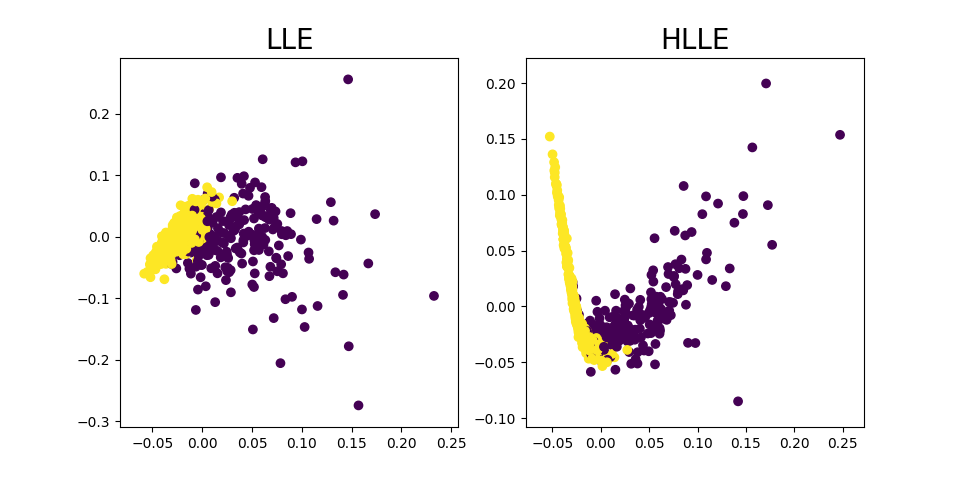

In [3]:
#2D
n_components = 2
n_neighbors = 50

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='dense',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='dense',
                                           method='hessian')

reduced_cancer_LLE = LLE.fit_transform(cancer.data)
reduced_cancer_HLLE = HLLE.fit_transform(cancer.data)

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1)
ax.scatter(reduced_cancer_LLE[:,0], reduced_cancer_LLE[:,1], c=cancer.target)
plt.title('LLE', fontsize=sizeTitle)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(reduced_cancer_HLLE[:,0], reduced_cancer_HLLE[:,1], c=cancer.target)
plt.title('HLLE', fontsize=sizeTitle)

plt.show()

<IPython.core.display.Javascript object>


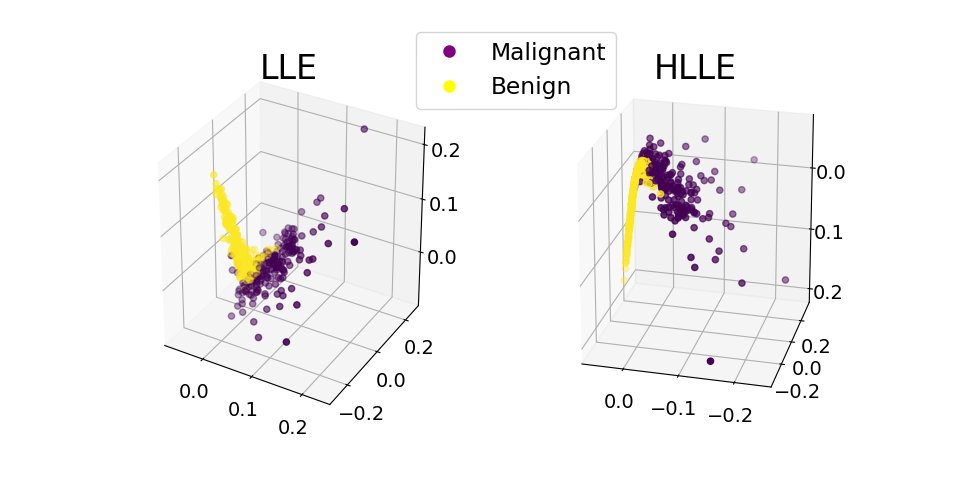

In [28]:
#3D
n_components = 3
n_neighbors = 50

LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='dense',
                                           method='standard')

HLLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                           eigen_solver='dense',
                                           method='hessian')

reduced_cancer_LLE = LLE.fit_transform(cancer.data)
reduced_cancer_HLLE = HLLE.fit_transform(cancer.data)

fig = plt.figure(figsize = plt.figaspect(0.5))
matplotlib.rcParams.update({'font.size':sizeAxis})
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(reduced_cancer_LLE[:,0], reduced_cancer_LLE[:,1], reduced_cancer_LLE[:,2], c=cancer.target, label=cancer.target_names)
plt.title('LLE', fontsize=sizeTitle)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Malignant',
                          markerfacecolor='purple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Benign',
                          markerfacecolor='yellow', markersize=10)]

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(reduced_cancer_HLLE[:,0], reduced_cancer_HLLE[:,1], reduced_cancer_HLLE[:,2], c=cancer.target, label=cancer.target_names)
plt.title('HLLE', fontsize=sizeTitle)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Malignant',
                          markerfacecolor='purple', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Benign',
                          markerfacecolor='yellow', markersize=10)]
ax.legend(handles=legend_elements, fontsize="large", bbox_to_anchor=(0.3, 1.1))

plt.show()

In [29]:
plt.savefig('cancer_LLE_HLLE.eps', format='eps', bbox_inches='tight')